In [2]:
!pip install asdf

You should consider upgrading via the 'pip install --upgrade pip' command.


In [25]:
import asdf
from goodman_pipeline.wcs import WCS
import os
from ccdproc import CCDData
import asdf
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [26]:
path = "/user/simon/development/soar/goodman_pipeline/goodman_pipeline/data/test_data/wcs_data"
_file = "goodman_comp_400M1_HgArNe.fits"

full_path = os.path.join(path, _file)

ccd = CCDData.read(full_path, unit='adu')

wcs = WCS()

wavelength, intensity = wcs.read_gsp_wcs(ccd=ccd)

model = wcs.get_model()

[19:47:50][I]: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


In [27]:
print(model)

Model: Chebyshev1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Degree: 3
Parameters:
          c0            c1               c2                c3        
    ------------- -------------- ----------------- ------------------
    3015.83283069 0.992828562705 1.30494707125e-06 -1.87873916604e-10


In [28]:
from astropy.modeling import models
poly = models.Polynomial1D(degree=3)
poly.c0.value = 3015.83283069
poly.c1.value = 0.992828562705
poly.c2.value = 1.30494707125e-06
poly.c3.value = -1.87873916604e-10
print(poly)

Model: Polynomial1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Degree: 3
Parameters:
          c0            c1               c2                c3        
    ------------- -------------- ----------------- ------------------
    3015.83283069 0.992828562705 1.30494707125e-06 -1.87873916604e-10


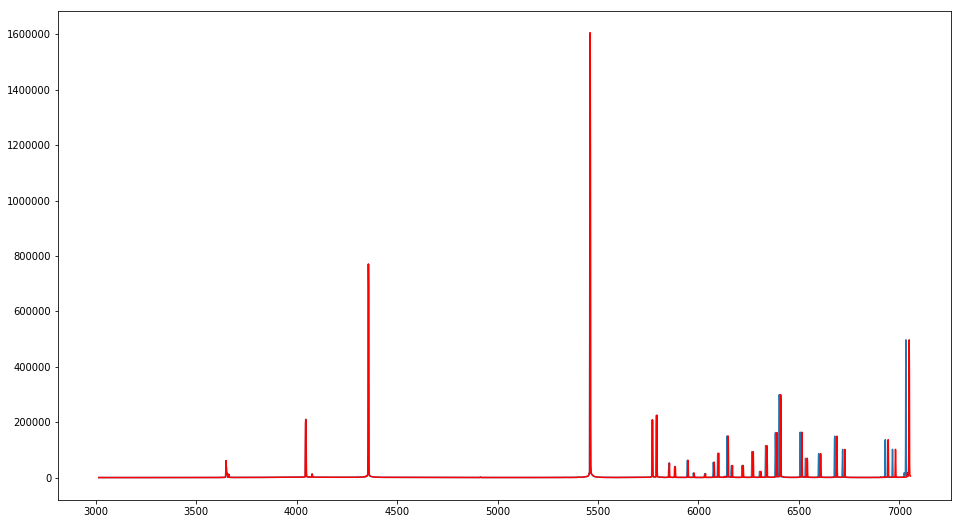

In [32]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.plot(wavelength, intensity)
ax.plot(poly(range(len(intensity))), intensity, color='r')
plt.show()

In [33]:
from asdf import AsdfFile

f = AsdfFile()

f.tree

{}

In [41]:
f.tree['model'] = poly
f.tree['wavelength'] = wavelength
f.tree['flux'] = intensity

In [40]:
f.write_to('testfile.asdf')

In [38]:
ff = asdf.open('testfile.asdf')
ff.tree['model'](range(len(intensity)))

array([ 3015.83283069,  3016.82566056,  3017.81849303, ...,  7052.67144504,
        7053.66558417,  7054.65972134])